In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

In [112]:
# Find the longest common subsequence between two given strings, returning the longest common string
def lcs(s1, s2):
    m = [[0] * (1 + len(s2)) for i in range(1 + len(s1))]
    longest, x_longest = 0, 0
    for x in range(1, 1 + len(s1)):
        for y in range(1, 1 + len(s2)):
            if s1[x - 1] == s2[y - 1]:
                m[x][y] = m[x - 1][y - 1] + 1
                if m[x][y] > longest:
                    longest = m[x][y]
                    x_longest = x
            else:
                m[x][y] = 0
    return s1[x_longest - longest: x_longest]

In [114]:
lcs_dict = pd.read_pickle('sequences/similarity/top_k_storage/s_30_e_100_.pkl')

In [116]:
char_to_codon = pd.read_pickle('sequences/char_to_codon.pkl')

In [117]:
repeat_sequences = []
subseq_appearances = {}
thresh = 3
for length, lcs_comps in lcs_dict.items():
    for seq, comps in lcs_comps:
        for comp in comps:
            if comp[1] >= thresh:
                subseq = lcs(seq, comp[0])
                appearance = subseq_appearances.setdefault(subseq, 1)
                repeat_sequences.append(subseq)
                subseq_appearances[subseq] = appearance + 1

In [118]:
repeat_set = set(repeat_sequences)

print(len(repeat_sequences))
print(len(repeat_set))

718
681


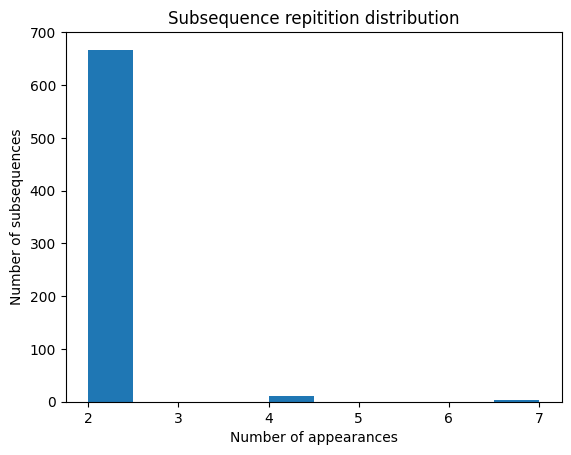

[667.   0.   0.   0.  11.   0.   0.   0.   0.   3.]
[2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7. ]


In [81]:
# Plot the distribution of sequence appearances
vals, bins, _ = plt.hist(subseq_appearances.values())
plt.title('Subsequence repitition distribution')
plt.xlabel('Number of appearances')
plt.ylabel('Number of subsequences')
plt.show()
print(vals)
print(bins)

In [82]:
all_diversity = {}
for seq in repeat_set:
    diversities = all_diversity.setdefault(len(seq), [])
    diversities.append(len(set([c for c in seq])))

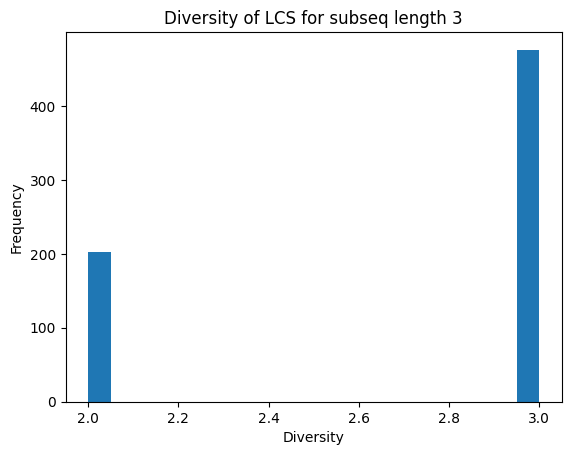

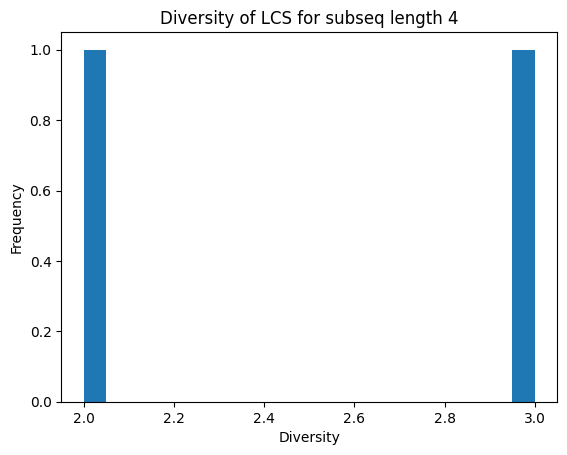

In [83]:
# Plot the distribution of diversity for each sequence length
for length, diversities in all_diversity.items():
    plt.hist(diversities, bins=20)
    plt.title('Diversity of LCS for subseq length {}'.format(length))
    plt.xlabel('Diversity')
    plt.ylabel('Frequency')
    plt.show()

In [88]:
appearance_to_seqs = {}
for seq, appearance in subseq_appearances.items():
    seqs = appearance_to_seqs.setdefault(appearance, [])
    seqs.append(seq)

In [90]:
interest_appearances = 4
sequences = appearance_to_seqs[interest_appearances]
perfect_div = 0
for seq in sequences:
    if len(set([c for c in seq])) == len(seq):
        perfect_div += 1

print(perfect_div)
print(len(sequences))
print("Percentage of perfect diversity: {}".format(perfect_div * 100 / len(sequences)))

4
11
Percentage of perfect diversity: 36.36363636363637


In [48]:
encoded_sequences_dict = pd.read_pickle('sequences/encoded_dict.pkl')

In [61]:
# interest_lengths = [3, 6]
# interest_subsequences = []
# for length in interest_lengths:
#     interest_subsequences += appearance_to_seqs[length]

interest_subsequences = repeat_set

subseq_to_cells = {}
for subseq in interest_subsequences:
    cells = subseq_to_cells.setdefault(subseq, [])
    for cell, seqs in encoded_sequences_dict.items():
        for seq in seqs:
            if subseq in seq:
                cells.append(cell)

In [62]:
cell_appearance = []
for subseq, cells in subseq_to_cells.items():
    cell_appearance.append(len(set(cells)))

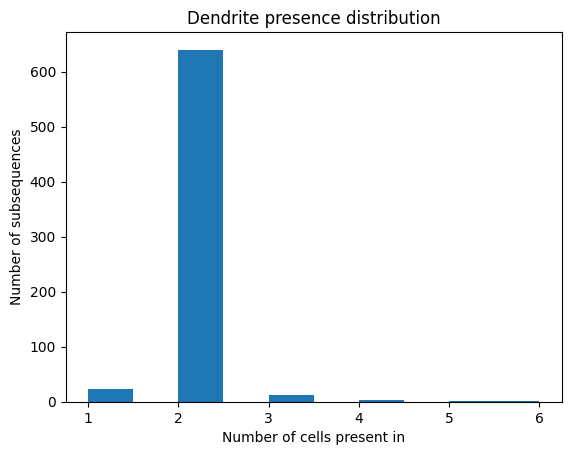

[ 23.   0. 640.   0.  13.   0.   3.   0.   1.   1.]
[1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]


In [63]:
# Plot the distribution of cell appearances
vals, bins, _ = plt.hist(cell_appearance)
plt.title('Dendrite presence distribution')
plt.xlabel('Number of cells present in')
plt.ylabel('Number of subsequences')
plt.show()
print(vals)
print(bins)

In [74]:
cell_appearance_to_seqs = {}
for subseq, cells in subseq_to_cells.items():
    _cell_appearance = len(set(cells))
    seqs = cell_appearance_to_seqs.setdefault(_cell_appearance, [])
    seqs.append(subseq)

In [77]:
interest_appearances = [3, 4, 5, 6]
subseq_diversities = []
for appearance in interest_appearances:
    subseq_diversities.append([len(set([c for c in seq])) / len(seq) for seq in cell_appearance_to_seqs[appearance]])

In [94]:
apps = [4, 7]
seqs = []
for app in apps:
    seqs.extend([(app, s) for s in appearance_to_seqs[app]])

for _app, seq in seqs:
    print(ut.get_printable(seq, char_to_codon), _app, subseq_appearances[seq])


<1z"><1C&><1z"> 4 4
<3Yf><3;\><3J$> 4 4
<1C&><6sQ><1C&> 4 4
<4Io><4%8><3;r> 4 4
<2*2><35s><2*2> 4 4
<6vh><2_"><6vh> 4 4
<35s><2*2><35s> 4 4
<5:F><60m><5:F> 4 4
<0\o><0N1><1Z,> 4 4
<5!s><65-><5\d> 4 4
<1>J><5+I><1>J> 4 4
<6vh><4>`><6vh> 7 7
<6vh><5yL><6vh> 7 7
<6vh><43R><6vh> 7 7


In [119]:
cells_df = pd.read_csv('cells_no_repeats.csv', index_col=0)
cells_df.set_index('pt_root_id', inplace=True)

In [120]:
char_to_pt_root_id = pd.read_pickle('sequences/char_to_pt_root_id.pkl')

In [110]:
for _app, seq in seqs:
    type_seq = ''.join(['<' + str(cells_df.loc[char_to_pt_root_id[c], 'cell_type']) +'>' for c in seq])
    print(ut.get_printable(seq, char_to_codon), type_seq, _app, subseq_appearances[seq])

<1z"><1C&><1z"> <23P><23P><23P> 4 4
<3Yf><3;\><3J$> <5P-ET><6P-CT><5P-ET> 4 4
<1C&><6sQ><1C&> <23P><23P><23P> 4 4
<4Io><4%8><3;r> <5P-IT><5P-IT><6P-IT> 4 4
<2*2><35s><2*2> <5P-IT><5P-IT><5P-IT> 4 4
<6vh><2_"><6vh> <23P><23P><23P> 4 4
<35s><2*2><35s> <5P-IT><5P-IT><5P-IT> 4 4
<5:F><60m><5:F> <6P-IT><6P-IT><6P-IT> 4 4
<0\o><0N1><1Z,> <5P-IT><23P><4P> 4 4
<5!s><65-><5\d> <5P-ET><4P><23P> 4 4
<1>J><5+I><1>J> <5P-ET><5P-IT><5P-ET> 4 4
<6vh><4>`><6vh> <23P><6P-CT><23P> 7 7
<6vh><5yL><6vh> <23P><5P-IT><23P> 7 7
<6vh><43R><6vh> <23P><23P><23P> 7 7


Sequence population is repeat sequences.

Look at input and output participation for each cell type:
- What cell types are the sequences composed of (output) (what are the cell types of the sequence participants)
- What cell types are the sequences found in (input) (what is the cell type of the dendrite)

Pie chart, these metrics compared to frequency of cell type in the entire dataset

Metrics:
- Sequence participation vs pre synaptic distribution:
    - If match:
        - No cell type is more likely to form a synapse that is part of a sequence than any other cell type
- Sequence synapse decoding vs post synaptic distribution:
    - If match:
        - Dendrites of all cell types decode sequences at equal rates
